# Anomaly Detection 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from  datetime import datetime as dt
%matplotlib inline
from sklearn.ensemble import IsolationForest

### Load the Dataset

In this assignment, I used Twitter_volume_GOOG.csv from the 'realtweets' dataset

In [2]:
df = pd.read_csv ('Twitter_volume_GOOG.csv', parse_dates = ['timestamp'], dtype = {'value': np.float32}, encoding = 'UTF-8')
df.head ()

,timestamp,value
0,2015-02-26 21:42:53,35.0
1,2015-02-26 21:47:53,41.0
2,2015-02-26 21:52:53,32.0
3,2015-02-26 21:57:53,36.0
4,2015-02-26 22:02:53,32.0


Text(0.5,1,'Trend of Values over Time')

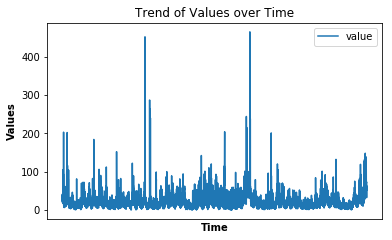

In [3]:
df.plot (y = 'value', x = 'timestamp')

plt.xticks ([])
plt.ylabel ('Values', fontweight = 'bold')
plt.xlabel ('Time', fontweight = 'bold')
plt.title ('Trend of Values over Time')

# Feature Engineering

In this part, I calculate the delta in each consecutive value in the dataset.

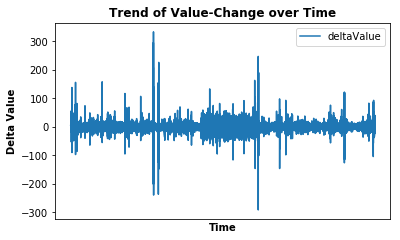

In [4]:
df['deltaValue'] = df ['value'] - df['value'].shift (1)
df.plot (y = 'deltaValue', x = 'timestamp')
df = df_mtsf.dropna ()

plt.xticks ([])
plt.ylabel ('Delta Value', fontweight = 'bold')
plt.xlabel ('Time', fontweight = 'bold')
plt.title ('Trend of Value-Change over Time', fontweight = 'bold')
plt.show ()

# Anomaly Detection - Isolation Forest

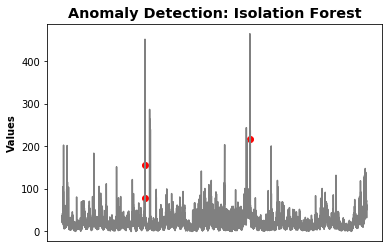

Wall time: 2.37 s


In [5]:
%%time
data = df [['deltaValue']]

outlierFraction = 3.0 / len (df_mtsf.index)
model = IsolationForest(contamination = outlierFraction)
model.fit(data)

df ['anomaly'] = pd.Series (model.predict(data))
df ['anomaly'] = df ['anomaly'].map( {1: 0, -1: 1} )

# Visualisation
fig, ax = plt.subplots ()
a = df.loc [df['anomaly'] == 1, ['timestamp', 'value']]
ax.plot (list (df ['timestamp']), list (df ['value']), color = 'grey')
ax.scatter (list (a ['timestamp']), list (a ['value']), color = 'red', lw = 1)

plt.title ('Anomaly Detection: Isolation Forest', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('Values', fontweight = 'bold')
plt.xticks ([])
plt.yticks ()
plt.show ()